In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv', skipfooter=2, engine = 'python')
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN
6,Afghanistan,2013,2116.465454,NaN
7,Afghanistan,2012,2075.491747,NaN
8,Afghanistan,2011,1904.559799,NaN
9,Afghanistan,2010,1957.029338,NaN


5. Added skipfooter = 2 to avoid the last two rows of the dataframe which had some footer data pertaining to the data exluded for South Sudan

In [3]:
gdp_df[-5:]

,Country or Area,Year,Value,Value Footnotes
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


In [4]:
gdp_df = (gdp_df
          .drop(columns = "Value Footnotes")
          .rename(columns={"Country or Area": "Country", "Value": "GDP_per_Capita"}))
                
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB


7. Rows = 3, Columns 6867

Country is an object, Year is a interger, GDP_per_Capita is a float

In [5]:
print(gdp_df["Year"].min())

print(gdp_df["Year"].max())

1990
2019


In [6]:
gdp_df["Year"].value_counts(sort = True)

2013    238
2014    238
2016    238
2015    238
2017    238
2012    237
2018    237
2011    237
2009    236
2010    236
2007    235
2008    235
2006    235
2004    234
2005    234
2002    233
2003    233
2001    232
2019    231
2000    231
1999    224
1998    223
1997    223
1996    221
1995    221
1994    214
1993    212
1992    209
1991    208
1990    207
Name: Year, dtype: int64

8. the number of observations increases from 1990 with 207 observations  until 2017 with 238. 2018 and 2019 decreased slightly with 237 and 231 observations, respectively. 

In [7]:
countries_of_gdp_df = gdp_df.drop_duplicates(subset="Country")
print(countries_of_gdp_df)

                  Country  Year  GDP_per_Capita
0             Afghanistan  2019     2065.036398
18                Albania  2019    13724.058790
48                Algeria  2019    11510.557088
78                 Angola  2019     6670.332297
108   Antigua and Barbuda  2019    21910.184985
...                   ...   ...             ...
6722              Vietnam  2019     8041.178551
6752   West Bank and Gaza  2019     6219.960291
6778                World  2019    16911.193295
6808               Zambia  2019     3470.448801
6838             Zimbabwe  2019     2835.948532

[238 rows x 3 columns]


9. 238 Countries are in the data set. Djibouti is represented the least. Several countries have 30 observations which is the most observations. They have fewer observations because they are small island countries or just small countries by land mass. 

In [8]:
gdp_df["Country"].value_counts(sort = True)

Iraq                         30
Algeria                      30
Brazil                       30
Low income                   30
Dem. Rep. Congo              30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, Length: 238, dtype: int64

In [9]:
gdp_2014 = gdp_df.loc[gdp_df['Year'] == 2014]

In [10]:
gdp_2014.describe()

,Year,GDP_per_Capita
count,238.0,238.000000
mean,2014.0,19766.710348
std,0.0,20983.869623
min,2014.0,822.610458
25%,2014.0,4753.110934
50%,2014.0,12209.385755
75%,2014.0,26803.610474
max,2014.0,156514.133850


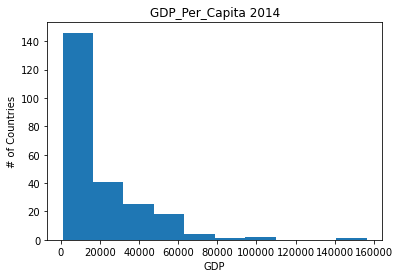

In [11]:
plt.hist(gdp_2014["GDP_per_Capita"], bins = 10)
plt.title("GDP_Per_Capita 2014")
plt.xlabel("GDP")
plt.ylabel("# of Countries")
plt.show;

12. Histogram description: Right skewed unimodal. 

In [12]:
countries_of_gdp_2014_srt = gdp_2014.drop_duplicates(subset="Country")
print(countries_of_gdp_2014_srt)

                  Country  Year  GDP_per_Capita
5             Afghanistan  2014     2102.385234
23                Albania  2014    11623.866679
53                Algeria  2014    11512.705405
83                 Angola  2014     8239.828837
113   Antigua and Barbuda  2014    18104.241470
...                   ...   ...             ...
6727              Vietnam  2014     6098.489609
6757   West Bank and Gaza  2014     5967.073437
6783                World  2014    15189.648507
6813               Zambia  2014     3450.046561
6843             Zimbabwe  2014     2955.240287

[238 rows x 3 columns]


In [13]:
countries_of_gdp_2014_srt.sort_values("GDP_per_Capita")

,Country,Year,GDP_per_Capita
1047,Central African Republic,2014,822.610458
827,Burundi,2014,886.235777
3781,Malawi,2014,1027.208496
1422,Dem. Rep. Congo,2014,1029.790785
4528,Niger,2014,1127.615541
...,...,...,...
561,Bermuda,2014,77361.104881
5464,Singapore,2014,87808.663157
5138,Qatar,2014,95578.416973
3691,Luxembourg,2014,108760.916030


13. 

Top 5: Macao, Luxumbourg, Qatar, Singapore, Bermuda

Bottom 5: Central African Republic, Burundi, Malawi, Dem Rep Congo, Niger.

In [14]:
gdp_pivoted = pd.pivot_table(gdp_df, 
                             values = "GDP_per_Capita" , 
                             columns = "Year", 
                             index = "Country")

In [15]:
gdp_pivoted = gdp_pivoted[[1990,2017]]

In [16]:
gdp_pivoted = gdp_pivoted.dropna()

In [17]:
gdp_pivoted["Percent_Change"] = 100*(gdp_pivoted[2017]-gdp_pivoted[1990])/gdp_pivoted[2017]

In [18]:
gdp_pivoted_srt = gdp_pivoted.sort_values("Percent_Change")
gdp_pivoted_srt.head(20)

Year,1990,2017,Percent_Change
Country,,,
Dem. Rep. Congo,1819.723315,1059.810775,-71.702662
United Arab Emirates,111454.360446,67183.626557,-65.895124
Burundi,1184.842440,773.571858,-53.165143
Ukraine,15751.722440,11871.123624,-32.689398
Central African Republic,1201.677234,912.802052,-31.647078
Tajikistan,3869.043636,3089.530208,-25.230808
Gabon,18179.265733,15006.764091,-21.140478
Congo,5115.210903,4274.296414,-19.673752
Madagascar,1853.051624,1584.422678,-16.954374


16. 17 countries experience a negative GDP perc change

In [19]:
gdp_pivoted.sort_values("Percent_Change", ascending = False)

Year,1990,2017,Percent_Change
Country,,,
Equatorial Guinea,1039.985049,22551.083246,95.388314
China,1423.896348,14344.421239,90.073518
Myanmar,619.645144,4739.910118,86.927070
East Asia & Pacific (excluding high income),2173.223895,12986.322227,83.265286
East Asia & Pacific (IDA & IBRD),2196.950288,13123.151792,83.258974
...,...,...,...
Central African Republic,1201.677234,912.802052,-31.647078
Ukraine,15751.722440,11871.123624,-32.689398
Burundi,1184.842440,773.571858,-53.165143


17. Equatorial Guinea had the highest perc change in GDP

In [20]:
gdp_guinea = gdp_df[gdp_df["Country"].isin(['Equatorial Guinea'])]
gdp_china = gdp_df[gdp_df["Country"].isin(['China'])]

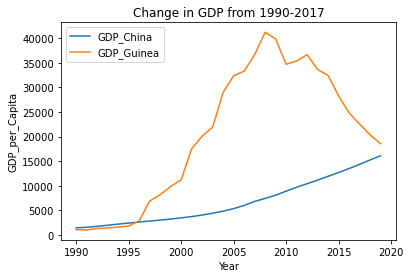

In [21]:
plt.plot(gdp_china["Year"], 
         gdp_china["GDP_per_Capita"])
plt.plot(gdp_guinea["Year"],
        gdp_guinea["GDP_per_Capita"]);
plt.xlabel("Year")
plt.ylabel("GDP_per_Capita")
plt.title("Change in GDP from 1990-2017")
plt.legend(["GDP_China", "GDP_Guinea"]);

In [22]:
continents = pd.read_csv('../data/continents.csv')

In [23]:
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


In [24]:
gdp_df.head()

,Country,Year,GDP_per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904


In [25]:
gdp_df = pd.merge(left = continents,
                 right = gdp_df,
                 on = 'Country');
gdp_df.head()

,Continent,Country,Year,GDP_per_Capita
0,Asia,Afghanistan,2019,2065.036398
1,Asia,Afghanistan,2018,2033.779002
2,Asia,Afghanistan,2017,2058.383832
3,Asia,Afghanistan,2016,2057.062164
4,Asia,Afghanistan,2015,2068.265904


In [26]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5443 entries, 0 to 5442
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Continent       5443 non-null   object 
 1   Country         5443 non-null   object 
 2   Year            5443 non-null   int64  
 3   GDP_per_Capita  5443 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 212.6+ KB


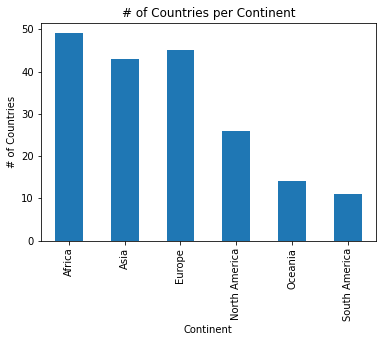

In [61]:
gdp_df.groupby("Continent")["Country"].nunique().plot(kind = 'bar')
plt.title("# of Countries per Continent")
plt.ylabel("# of Countries");

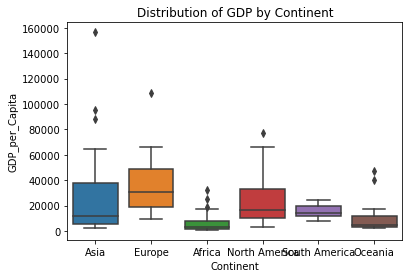

In [62]:
sns.boxplot(data = gdp_df.loc[gdp_df['Year'] == 2014], #loc for pulling out just the year 2014
            x = 'Continent',
            y = 'GDP_per_Capita')
plt.title("Distribution of GDP by Continent")
;

In [29]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 4500)

In [30]:
internet_df.head(-5)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


In [31]:
internet_df = (internet_df
               .drop(columns = 'Value Footnotes')
               .rename(columns={"Country or Area": "Country", "Value": "Internet_Users_Pct"})
              .dropna())

In [32]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   object 
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), object(2)
memory usage: 140.5+ KB


In [33]:
internet_df["Year"] = pd.to_numeric(internet_df["Year"]) # Year was an object which was making my graphs have the years in descending order

In [34]:
internet_df[internet_df["Internet_Users_Pct"] > 0].sort_values("Year") 

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
...,...,...,...
2175,Kiribati,2014,12.250000
848,Colombia,2014,52.570000
1299,Ethiopia,2014,2.900000
623,Burundi,2014,1.380000


In [35]:
internet_df_mean = internet_df.groupby('Year')['Internet_Users_Pct'].mean() #Thank you Chris Mulvey for the groupby and .mean 

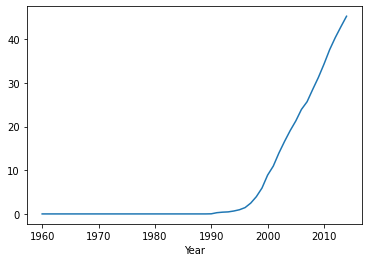

In [36]:
internet_df_mean.plot(kind = 'line',
                      x='Year',
                      y='Internet_Users_Pct'); #fix y axis

1990 is the first year with a non-zero internet_users_pct

In [37]:
gdp_and_internet_use = pd.merge(left = internet_df,
                 right = gdp_df,
                 on = ('Country','Year'));
gdp_and_internet_use.head(5)

,Country,Year,Internet_Users_Pct,Continent,GDP_per_Capita
0,Afghanistan,2014,6.390000,Asia,2102.385234
1,Afghanistan,2013,5.900000,Asia,2116.465454
2,Afghanistan,2012,5.454545,Asia,2075.491747
3,Afghanistan,2011,5.000000,Asia,1904.559799
4,Afghanistan,2010,4.000000,Asia,1957.029338


In [38]:
gdp_and_internet_use.head(-5)

,Country,Year,Internet_Users_Pct,Continent,GDP_per_Capita
0,Afghanistan,2014,6.390000,Asia,2102.385234
1,Afghanistan,2013,5.900000,Asia,2116.465454
2,Afghanistan,2012,5.454545,Asia,2075.491747
3,Afghanistan,2011,5.000000,Asia,1904.559799
4,Afghanistan,2010,4.000000,Asia,1957.029338
...,...,...,...,...,...
3448,Zimbabwe,2002,3.994356,Africa,3190.506481
3449,Zimbabwe,2001,0.799846,Africa,3510.893992
3450,Zimbabwe,2000,0.401434,Africa,3473.429801
3451,Zimbabwe,1999,0.161676,Africa,3600.849291


In [39]:
gdp_and_internet_use_2014 = gdp_and_internet_use.loc[gdp_and_internet_use['Year'] == 2014]
gdp_and_internet_use_2014.head()

,Country,Year,Internet_Users_Pct,Continent,GDP_per_Capita
0,Afghanistan,2014,6.39,Asia,2102.385234
13,Albania,2014,60.10,Europe,11623.866679
34,Algeria,2014,18.09,Africa,11512.705405
56,Angola,2014,21.26,Africa,8239.828837
76,Antigua and Barbuda,2014,64.00,North America,18104.241470


In [40]:
gdp_and_internet_use_2014[gdp_and_internet_use_2014["Internet_Users_Pct"] > 90].value_counts().sum()

13

In [41]:
gdp_and_internet_use_2014_srt = gdp_and_internet_use_2014.sort_values("GDP_per_Capita", ascending = False)
gdp_and_internet_use_2014_srt.head(3)

,Country,Year,Internet_Users_Pct,Continent,GDP_per_Capita
1798,Luxembourg,2014,94.67,Europe,108760.916030
2542,Qatar,2014,91.49,Asia,95578.416973
2751,Singapore,2014,82.00,Asia,87808.663157


In [42]:
top_3 = gdp_and_internet_use[gdp_and_internet_use["Country"].isin(['Luxembourg', 'Qatar', 'Singapore'])]
top_3.head()

,Country,Year,Internet_Users_Pct,Continent,GDP_per_Capita
1798,Luxembourg,2014,94.670000,Europe,108760.916030
1799,Luxembourg,2013,93.776500,Europe,106767.275005
1800,Luxembourg,2012,91.949924,Europe,105411.464571
1801,Luxembourg,2011,90.029859,Europe,108355.582583
1802,Luxembourg,2010,90.620000,Europe,108047.346867


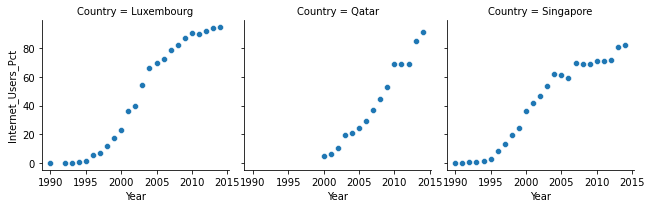

In [43]:
facetgrid = sns.FacetGrid(top_3,col='Country') #initializes the grid and selects which column to use 
facetgrid.map(sns.scatterplot, "Year", "Internet_Users_Pct",); #adds the selected data into the facetgrid

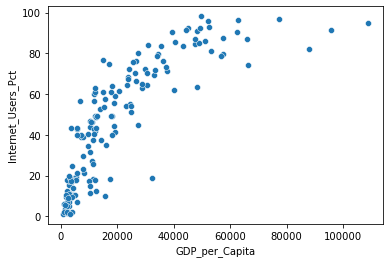

In [44]:
sns.scatterplot(data = gdp_and_internet_use_2014, y = "Internet_Users_Pct", x = "GDP_per_Capita");

GDP_per_Capita is a strong predictor for percentage of internet users. The higher the GDP_per_Capita the higher the internet_user_Pct. The relationship is not exactly linear. It shoots up rapidly at low GDP, but plateaus around 60K GDP with little change in internet user per after 60K. 

In [45]:
gdp_and_internet_use_2014.corr()

,Year,Internet_Users_Pct,GDP_per_Capita
Year,NaN,NaN,NaN
Internet_Users_Pct,NaN,1.000000,0.824627
GDP_per_Capita,NaN,0.824627,1.000000


A correlation coefficient of 0.82 is a strong positive correlation between GDP_per_Capita and Internet_User_Pct

In [49]:
gdp_and_internet_use_2014['Log_GDP_per_Capita'] = np.log(gdp_and_internet_use_2014["GDP_per_Capita"])

<ipython-input-49-0dc2a3dc80a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['Log_GDP_per_Capita'] = np.log(gdp_and_internet_use_2014["GDP_per_Capita"])


In [50]:
gdp_and_internet_use_2014

,Country,Year,Internet_Users_Pct,Continent,GDP_per_Capita,Log_GDP_per_Capita
0,Afghanistan,2014,6.39,Asia,2102.385234,7.650828
13,Albania,2014,60.10,Europe,11623.866679,9.360816
34,Algeria,2014,18.09,Africa,11512.705405,9.351207
56,Angola,2014,21.26,Africa,8239.828837,9.016735
76,Antigua and Barbuda,2014,64.00,North America,18104.241470,9.803902
...,...,...,...,...,...,...
3351,Uruguay,2014,61.46,South America,20582.168953,9.932180
3373,Uzbekistan,2014,43.55,Asia,5764.492705,8.659472
3394,Vanuatu,2014,18.80,Oceania,3116.077025,8.044330
3414,Zambia,2014,17.34,Africa,3450.046561,8.146143


In [51]:
gdp_and_internet_use_2014.corr()

,Year,Internet_Users_Pct,GDP_per_Capita,Log_GDP_per_Capita
Year,NaN,NaN,NaN,NaN
Internet_Users_Pct,NaN,1.000000,0.824627,0.903987
GDP_per_Capita,NaN,0.824627,1.000000,0.864009
Log_GDP_per_Capita,NaN,0.903987,0.864009,1.000000


The correlation coefficient is higher for Log_GDP_per_Capita than it is for the untransformed GDP_per_Capita. If we replot the scatter plot with Log_GDP_per_Capita, we can see that the points fall more along a straight line instead of rapidly increasing and plateauing. 

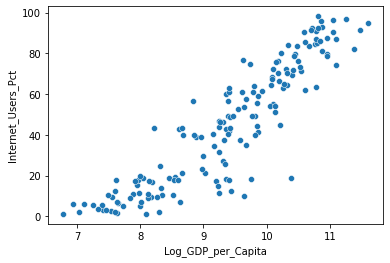

In [52]:
sns.scatterplot(data = gdp_and_internet_use_2014, y = "Internet_Users_Pct", x = "Log_GDP_per_Capita");

In [55]:
USA = gdp_and_internet_use[gdp_and_internet_use["Country"].isin(['United States'])]

In [56]:
USA.corr()

,Year,Internet_Users_Pct,GDP_per_Capita
Year,1.000000,0.969113,0.96344
Internet_Users_Pct,0.969113,1.000000,0.99166
GDP_per_Capita,0.963440,0.991660,1.00000


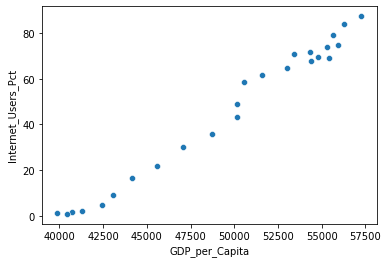

In [57]:
sns.scatterplot(data = USA, y = "Internet_Users_Pct", x = "GDP_per_Capita");

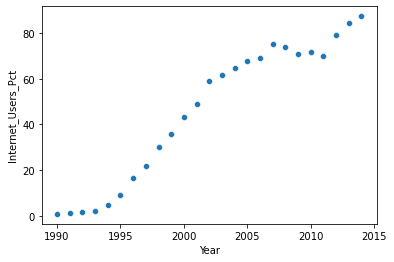

In [58]:
sns.scatterplot(data = USA, y = "Internet_Users_Pct", x = "Year");

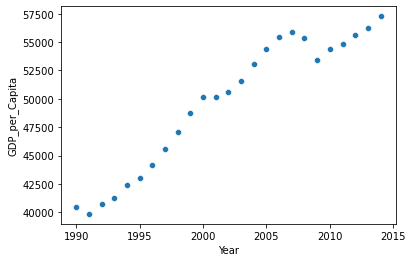

In [59]:
sns.scatterplot(data = USA, y = "GDP_per_Capita", x = "Year");

There is a strong positive correlation between GDP_per_Capita and Internet_Users_Pct for the USA. However there is almost an equally positive correlation between Internet_Users_Pct and year. It's hard to see if GDP is a good predictor for internet use or if the passage of the years since the internet was invented is a stronger predictor for the USA. 